<a href="https://colab.research.google.com/github/yashwanthbooram/SUMMER-TERM-PROJECT-CipherSchools/blob/main/Customer_Behavior_Analytics_for_Retail_Stores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Load and Clean the Data
python

In [4]:
import pandas as pd

# Load the dataset
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Step 2: Perform EDA

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


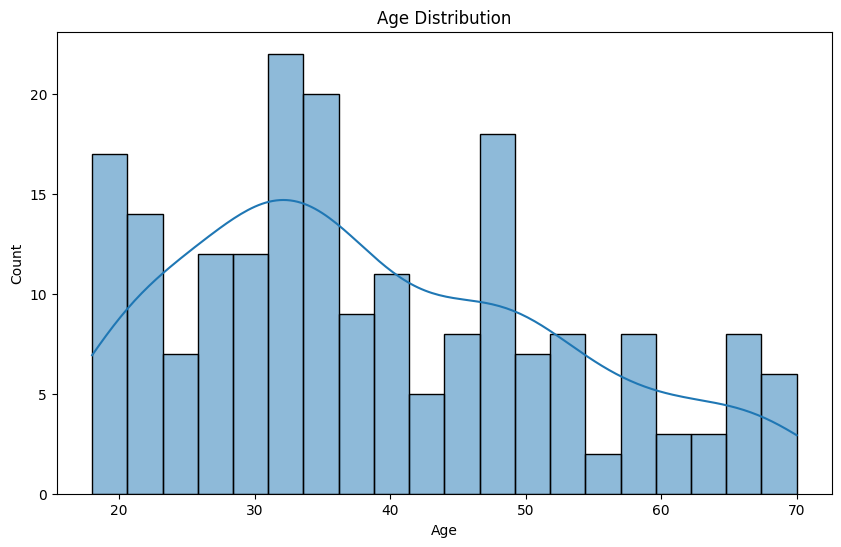

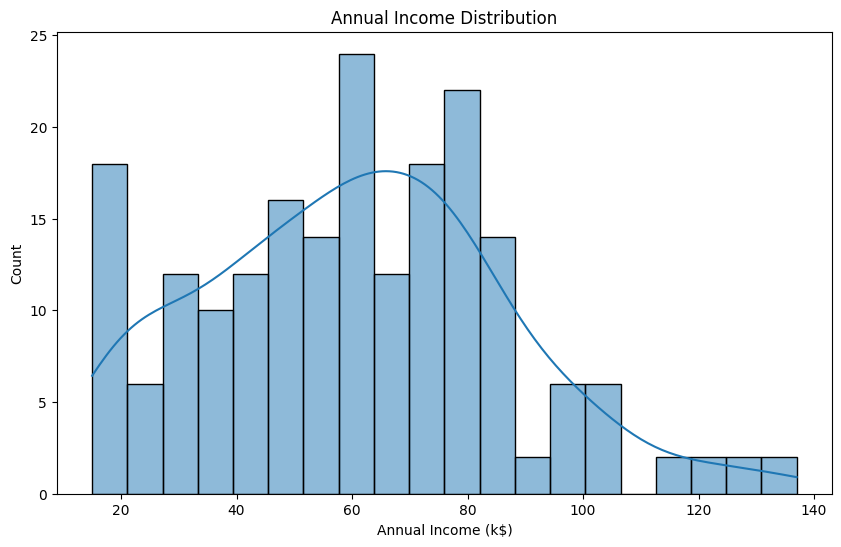

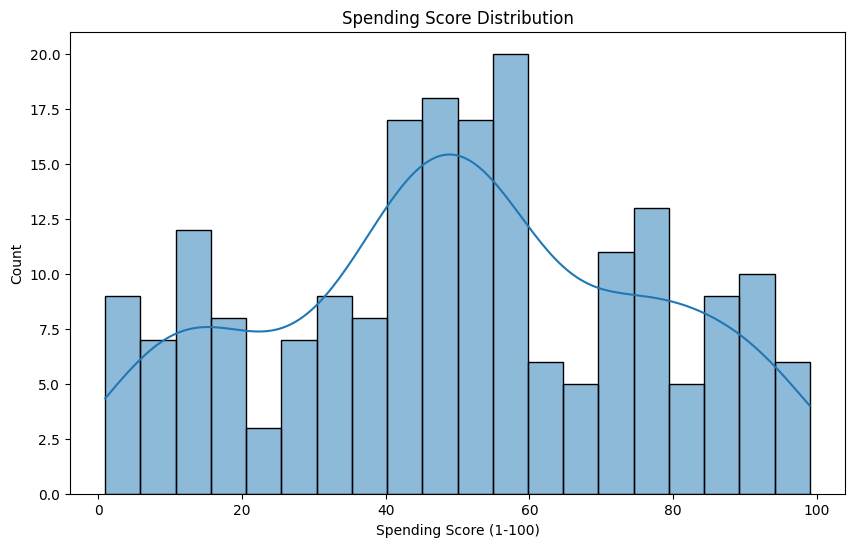

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize distributions of features
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.show()


Step 3: RFM Analysis

We will now compute the RFM scores. Within the framework of the given dataset, we'll make use of:

**Recency:** Presuming we have a similar timestamp or a date of purchase.

**Frequency:** How frequently something are bought.

***Monetary: ***The entire amount of money.

Based on the attributes that are available, we may replicate RFM analysis even though the dataset does not contain explicit purchase data.

In [6]:
# Simulated RFM analysis based on available features
# Assuming Spending Score is a proxy for Monetary, and Annual Income for Frequency

# RFM score calculation
rfm = data[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Simulating recency, frequency, and monetary value
# Recency could be inversely related to age for this example
rfm['Recency'] = 2024 - rfm['Age']  # Assuming the data is from 2024
rfm['Frequency'] = rfm['Annual Income (k$)']
rfm['Monetary'] = rfm['Spending Score (1-100)']

# Normalizing the values for RFM scoring
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=range(5, 0, -1))
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=range(1, 6))
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=range(1, 6))

# Combine RFM scores
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

rfm.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,1,19,15,39,2005,15,39,1,1,2,112
1,2,21,15,81,2003,15,81,1,1,5,115
2,3,20,16,6,2004,16,6,1,1,1,111
3,4,23,16,77,2001,16,77,1,1,5,115
4,5,31,17,40,1993,17,40,2,1,2,212


Step 4: K-means Clustering

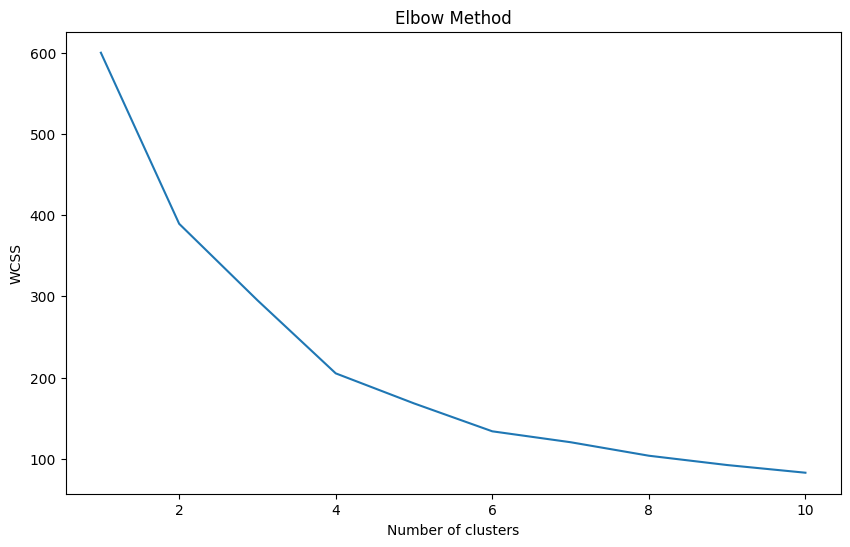

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Cluster
0,1,19,15,39,2005,15,39,1,1,2,112,2
1,2,21,15,81,2003,15,81,1,1,5,115,2
2,3,20,16,6,2004,16,6,1,1,1,111,3
3,4,23,16,77,2001,16,77,1,1,5,115,2
4,5,31,17,40,1993,17,40,2,1,2,212,2


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features = rfm[['Recency', 'Frequency', 'Monetary']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-means with the optimal number of clusters
optimal_clusters = 5  # Based on the Elbow method plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(features_scaled)

rfm.head()


Step 5: Visualization

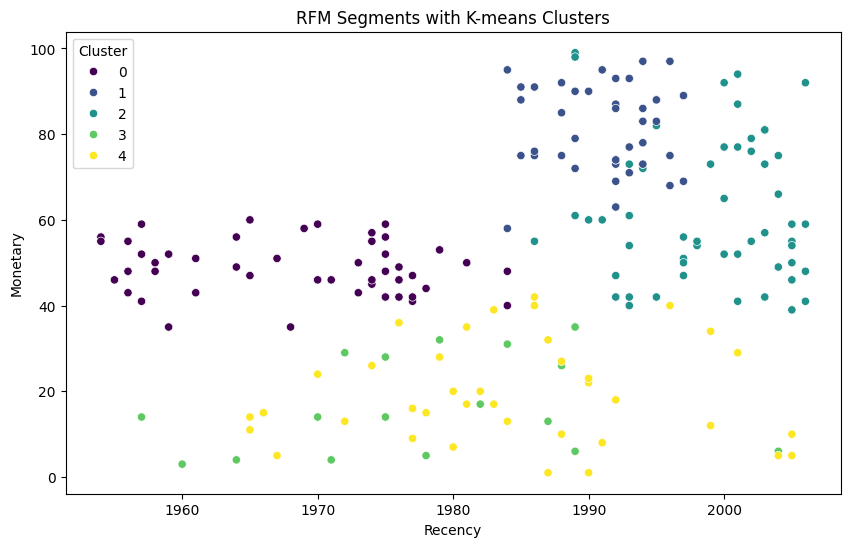

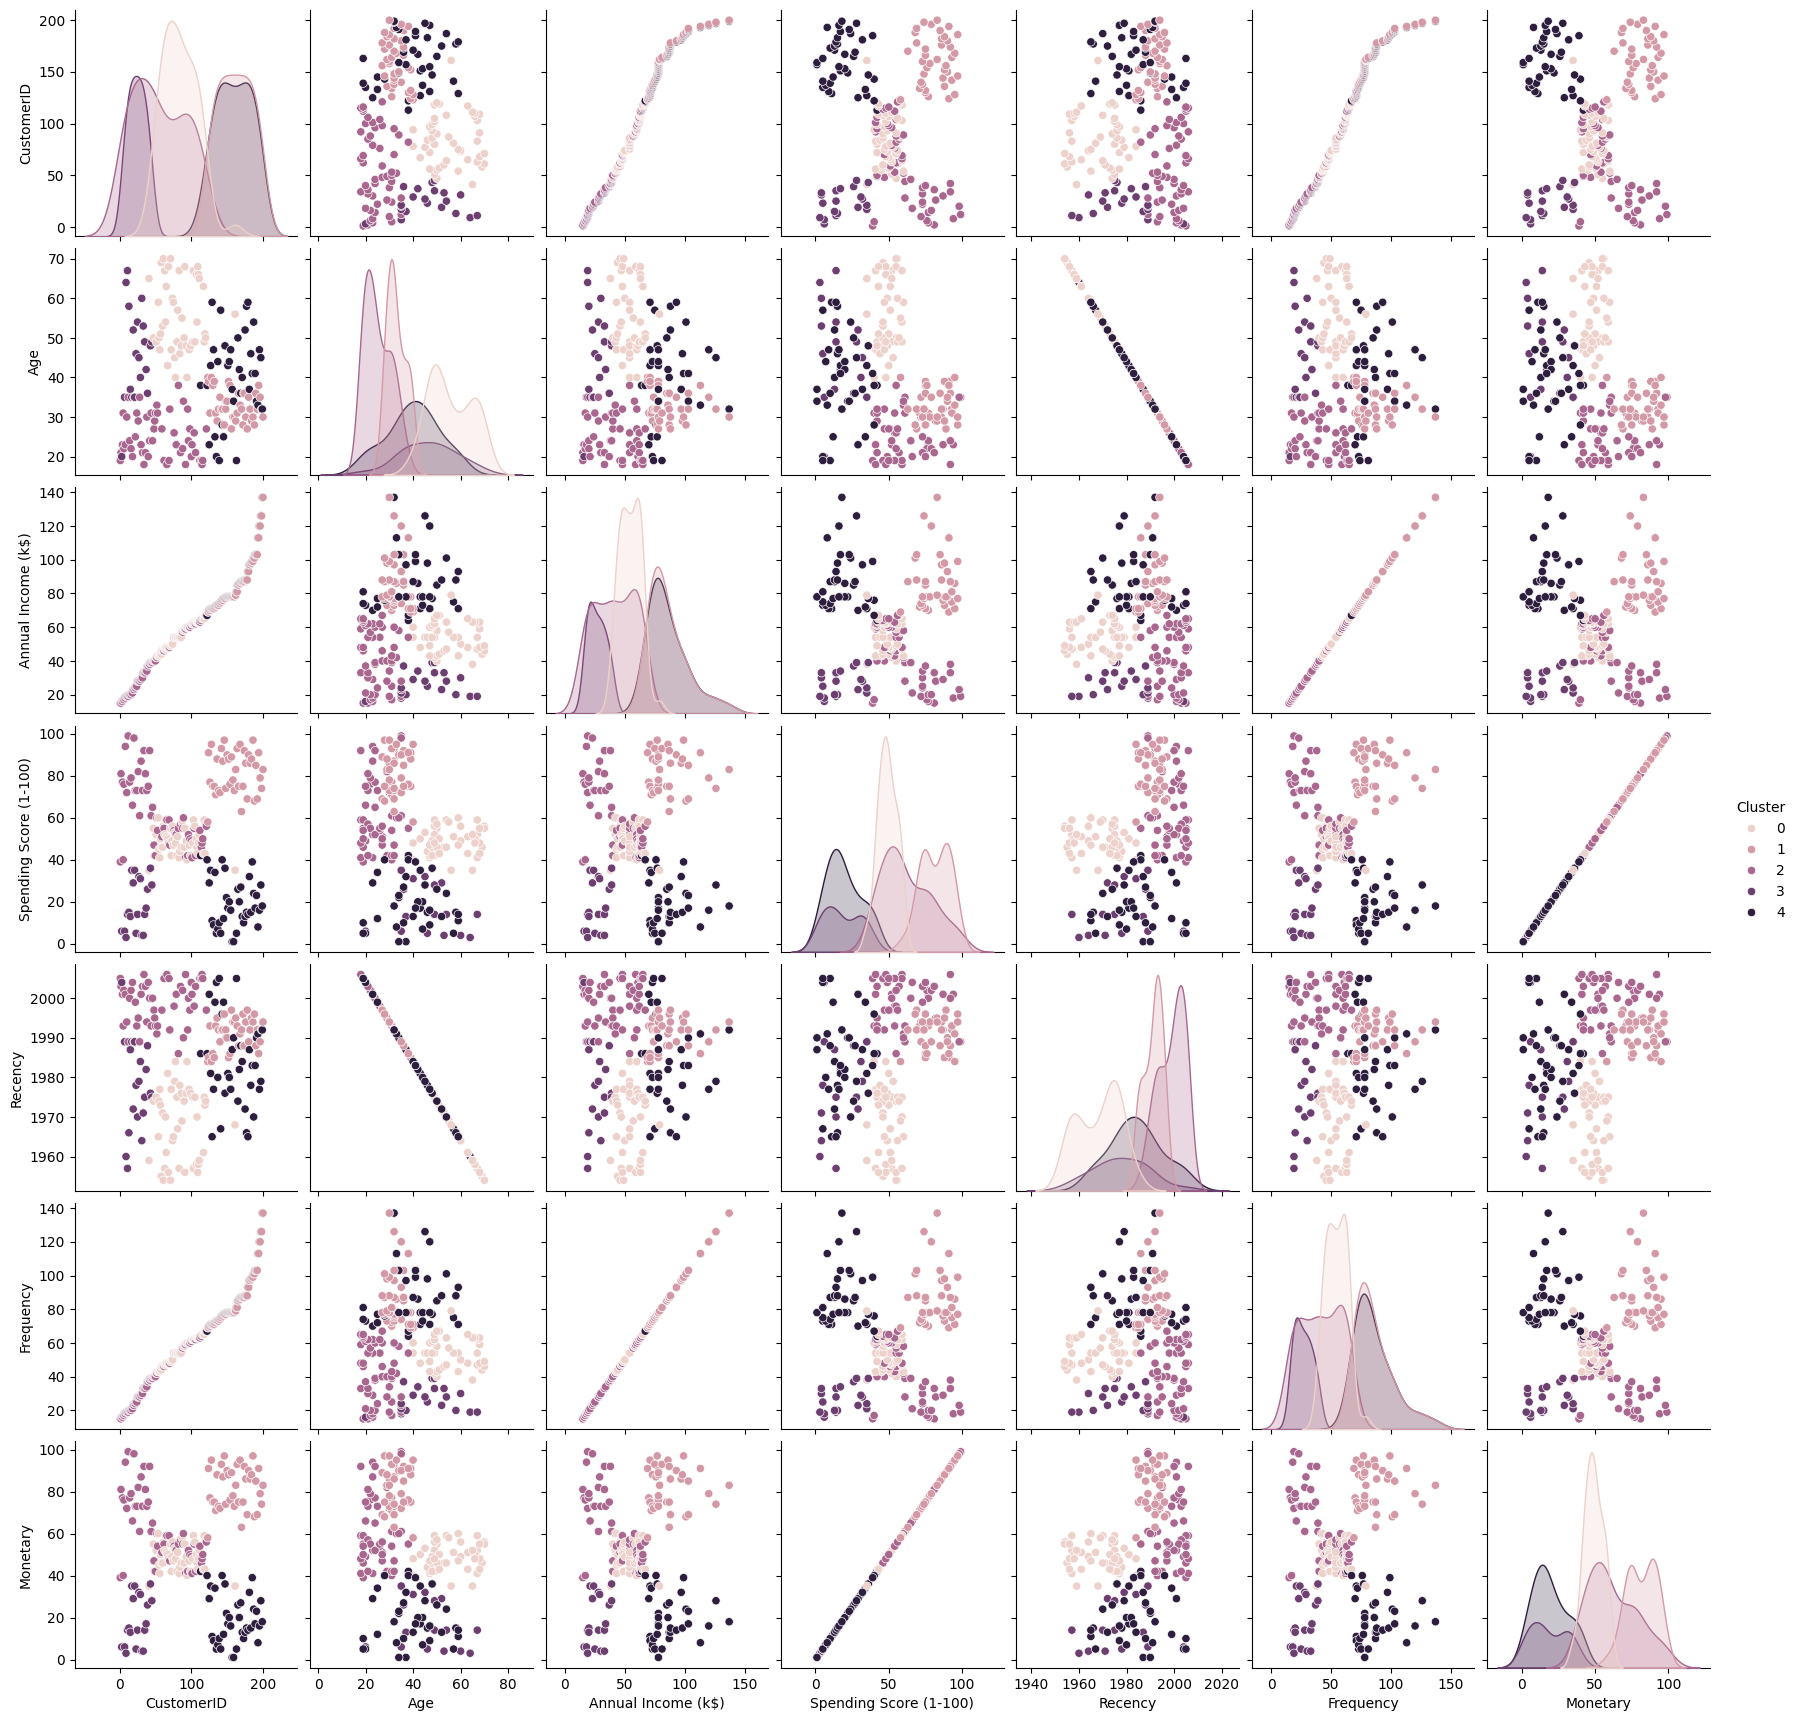

In [8]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.title('RFM Segments with K-means Clusters')
plt.show()

# Additional visualizations
sns.pairplot(rfm, hue='Cluster')
plt.show()


This code takes care of loading the data, running EDA, figuring out RFM scores, using K-means clustering, and displaying the outcomes.